# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(color_codes=True)
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

# Loading Datasets

In [2]:
dataset_1 = pd.read_csv('pek-sha.csv')
dataset_2 = pd.read_csv('sha-pek.csv')
dataset = pd.concat([dataset_1,dataset_2], ignore_index = True)

In [3]:
print(dataset.shape)
dataset

(568917, 14)


,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568912,77617774,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,830,0.56,2019-07-14 23:28:01,7
568913,77617775,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,880,0.60,2019-07-14 23:28:01,7
568914,77617776,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,920,0.62,2019-07-14 23:28:01,7
568915,77617777,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,790,0.54,2019-07-14 23:28:01,7


# Understanding data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568917 entries, 0 to 568916
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              568917 non-null  int64  
 1   flightNumber    568917 non-null  object 
 2   craftTypeCode   568917 non-null  object 
 3   depAirport      568917 non-null  object 
 4   traAirport      10861 non-null   object 
 5   arrAirport      568917 non-null  object 
 6   departureDate   568917 non-null  object 
 7   arrivalDate     568917 non-null  object 
 8   cabinClass      568917 non-null  object 
 9   priceClass      568917 non-null  object 
 10  price           568917 non-null  int64  
 11  rate            568917 non-null  float64
 12  createDate      568917 non-null  object 
 13  dateDifference  568917 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 60.8+ MB


In [5]:
dataset.nunique()

ID                568917
flightNumber         100
craftTypeCode         45
depAirport             2
traAirport             1
arrAirport             2
departureDate      12823
arrivalDate        14704
cabinClass             3
priceClass            32
price                681
rate                  87
createDate          1249
dateDifference        15
dtype: int64

In [6]:
print('Uniques values in depAirport',dataset.depAirport.unique())
print('Uniques values in arrAirport',dataset.arrAirport.unique())
print('Uniques values in traAirport',dataset.traAirport.unique())
print('Uniques values in cabinClass',dataset.cabinClass.unique())
print('Uniques values in priceClass',dataset.priceClass.unique())

Uniques values in depAirport ['PEK' 'SHA']
Uniques values in arrAirport ['SHA' 'PEK']
Uniques values in traAirport [nan 'LYA']
Uniques values in cabinClass ['C' 'F' 'Y']
Uniques values in priceClass ['C' 'I' 'J' 'R' 'D' 'Z' 'Q' 'A' 'F' 'P' 'U' 'T' 'Y' 'S' 'W' 'L' 'S1' 'V'
 'B' 'M' 'G' 'H' 'K' 'E' 'N' 'X' 'M1' 'BZ' 'XC' 'MC' 'NZ' 'VZ']


In [7]:
dataset.isnull().sum()

ID                     0
flightNumber           0
craftTypeCode          0
depAirport             0
traAirport        558056
arrAirport             0
departureDate          0
arrivalDate            0
cabinClass             0
priceClass             0
price                  0
rate                   0
createDate             0
dateDifference         0
dtype: int64

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,568917.0,3.709192e+07,2.292971e+07,3149.0,17475485.00,35736514.00,55746318.0,80165001.0
price,568917.0,2.203162e+03,1.747348e+03,235.0,1010.00,1490.00,2980.0,6410.0
rate,568917.0,7.681138e-01,2.501034e-01,0.0,0.53,0.86,1.0,1.0
dateDifference,568917.0,6.586815e+00,7.407127e+00,-1.0,2.00,5.00,7.0,30.0


# Duplicates

In [9]:
duplicate = dataset[dataset.duplicated(keep = False)]
duplicate

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference


# Data preprocessing

In [10]:
dataset['departureDate']=pd.to_datetime(dataset['departureDate'],format="%Y/%m/%d")
dataset['arrivalDate']=pd.to_datetime(dataset['arrivalDate'],format="%Y/%m/%d")
dataset['createDate']=pd.to_datetime(dataset['createDate'],format="%Y/%m/%d")

In [11]:
#Adding a column named indirectFlight, if it is a direct flight then putting 0 in the column value else 1.
dataset['indirectFlight'] = np.where(dataset['traAirport']=='LYA',1,0)

In [12]:
#extracting departure year,month,date,day,hour from departureDate
dataset['depYear'] = pd.DatetimeIndex(dataset['departureDate']).year
dataset['depMonth'] = pd.DatetimeIndex(dataset['departureDate']).month
dataset['depDate'] = pd.DatetimeIndex(dataset['departureDate']).day
dataset['depDay'] = pd.DatetimeIndex(dataset['departureDate']).dayofweek
dataset['depHour'] = pd.DatetimeIndex(dataset['departureDate']).hour

In [13]:
#extracting create year,month,date,day,hour from createDate
dataset['creYear'] = pd.DatetimeIndex(dataset['createDate']).year
dataset['creMonth'] = pd.DatetimeIndex(dataset['createDate']).month
dataset['creDate'] = pd.DatetimeIndex(dataset['createDate']).day
dataset['creDay'] = pd.DatetimeIndex(dataset['createDate']).dayofweek
dataset['creHour'] = pd.DatetimeIndex(dataset['createDate']).hour

In [14]:
#converting object type into datetime type
dataset['departureDate'] = pd.to_datetime(dataset['departureDate'])
dataset['arrivalDate'] = pd.to_datetime(dataset['arrivalDate'])
dataset['createDate'] = pd.to_datetime(dataset['createDate'])

In [15]:
#Adding a column named flightDuration which is the difference between departure and arrival
dataset['flightDuration']= (dataset['arrivalDate']-dataset['departureDate']).astype('timedelta64[m]')

In [16]:
dataset

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,indirectFlight,depYear,depMonth,depDate,depDay,depHour,creYear,creMonth,creDate,creDay,creHour,flightDuration
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1,0,2019,1,4,4,6,2019,1,3,3,14,140.0
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1,0,2019,1,4,4,7,2019,1,3,3,14,135.0
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1,0,2019,1,4,4,7,2019,1,3,3,14,135.0
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1,0,2019,1,4,4,7,2019,1,3,3,14,135.0
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1,0,2019,1,4,4,7,2019,1,3,3,14,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568912,77617774,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,830,0.56,2019-07-14 23:28:01,7,1,2019,7,21,6,7,2019,7,14,6,23,280.0
568913,77617775,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,880,0.60,2019-07-14 23:28:01,7,1,2019,7,21,6,7,2019,7,14,6,23,280.0
568914,77617776,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,920,0.62,2019-07-14 23:28:01,7,1,2019,7,21,6,7,2019,7,14,6,23,280.0
568915,77617777,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,790,0.54,2019-07-14 23:28:01,7,1,2019,7,21,6,7,2019,7,14,6,23,280.0


In [17]:
#removing rows if it has booking after departure
dataset =  dataset[((dataset['departureDate']-dataset['createDate'])/np.timedelta64(1,'s'))>0]
dataset.shape

(568742, 26)

In [18]:
dataset['airline'] = dataset['flightNumber'].astype(str).str[0:2]

In [19]:
dataset.airline.unique()

array(['HO', 'MU', 'HU', 'CA', 'CZ', 'FM', 'MF'], dtype=object)

# Data vizualization

<AxesSubplot:xlabel='departureDate'>

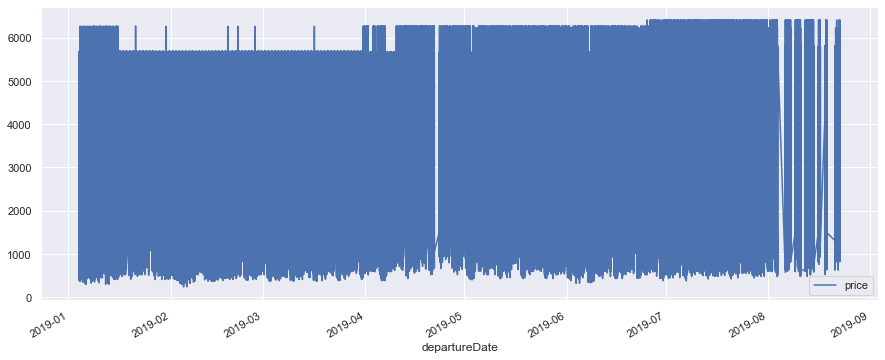

In [20]:
dataset.plot(x='departureDate',y='price',kind='line', figsize = (15,6))

In [21]:
dataset.columns

Index(['ID', 'flightNumber', 'craftTypeCode', 'depAirport', 'traAirport',
       'arrAirport', 'departureDate', 'arrivalDate', 'cabinClass',
       'priceClass', 'price', 'rate', 'createDate', 'dateDifference',
       'indirectFlight', 'depYear', 'depMonth', 'depDate', 'depDay', 'depHour',
       'creYear', 'creMonth', 'creDate', 'creDay', 'creHour', 'flightDuration',
       'airline'],
      dtype='object')

In [22]:
plot_features1 = ['craftTypeCode', 'depAirport','cabinClass','priceClass','indirectFlight','airline']

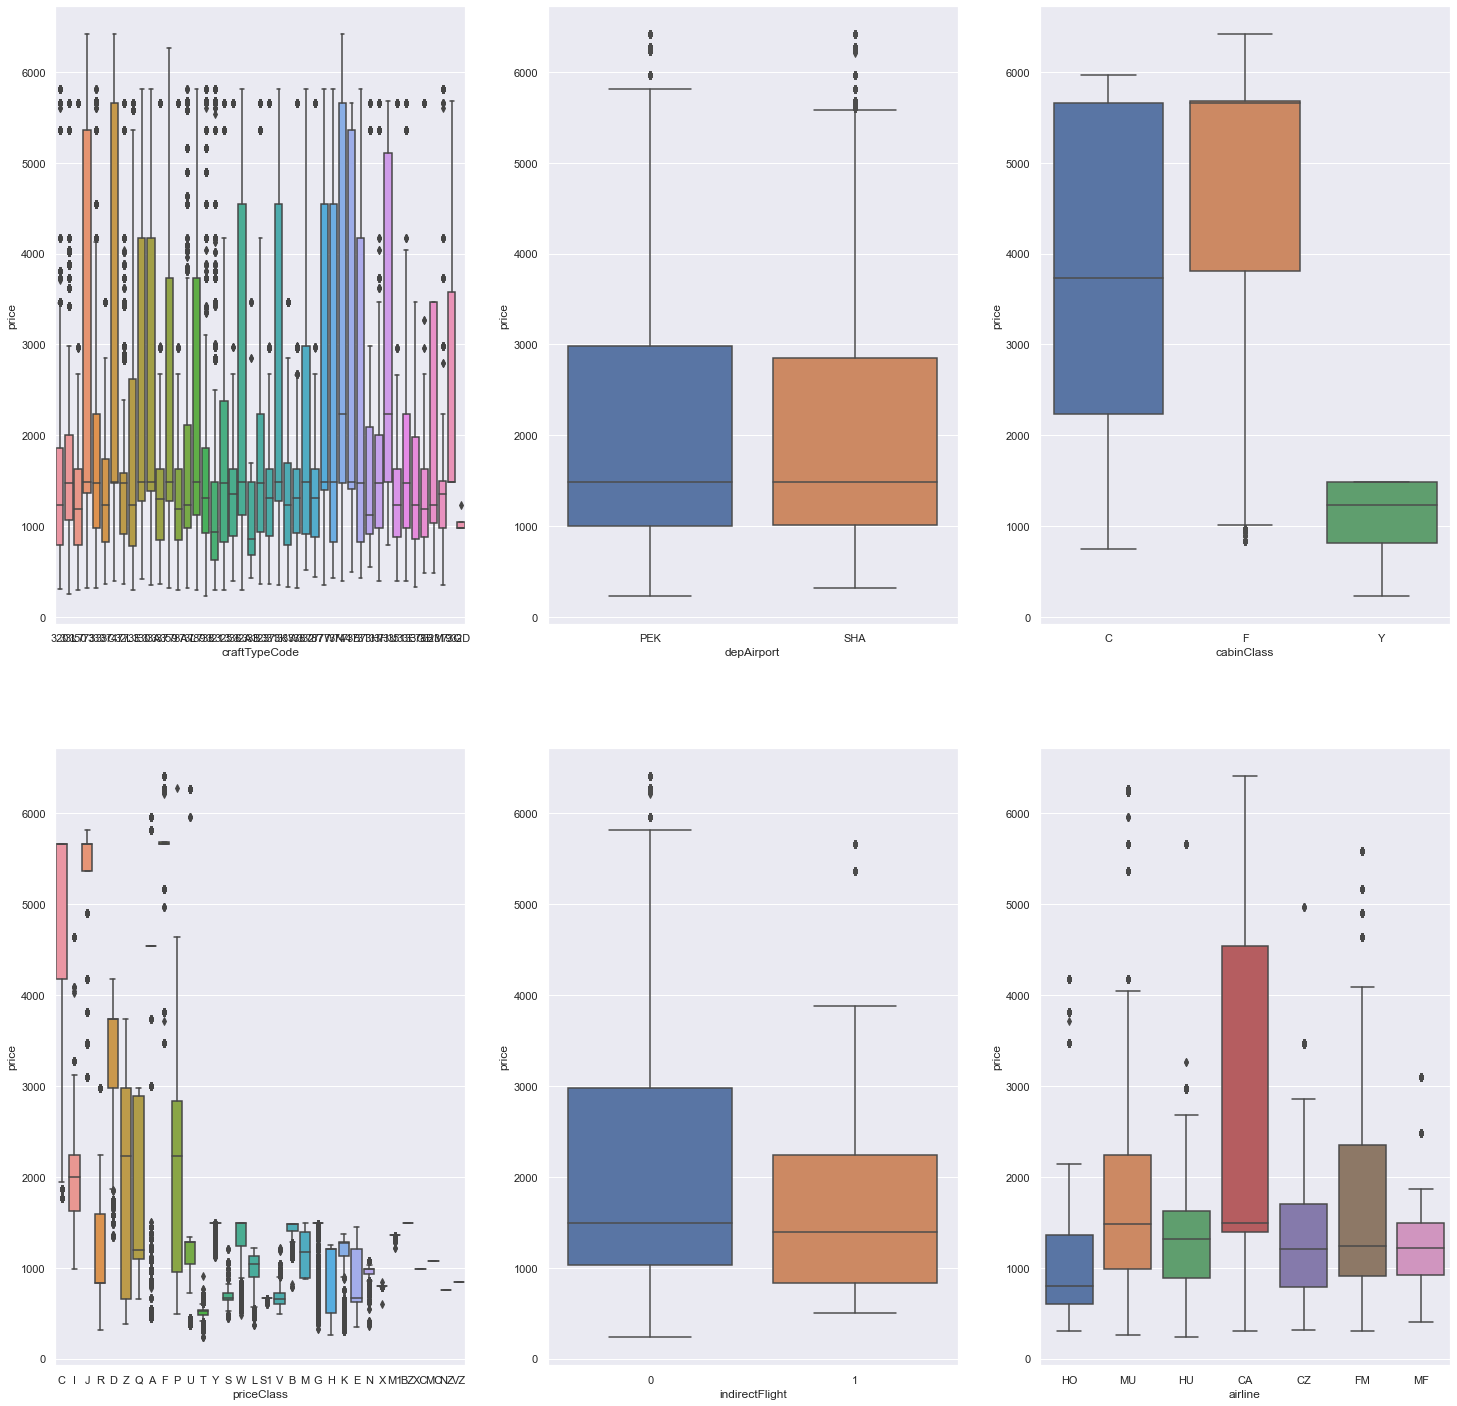

In [23]:
plt.figure(figsize=(25,25))
i=1
for feature in plot_features1:
    plt.subplot(2,3,i)
    sns.boxplot(x = feature, y = 'price', data = dataset)
    i+=1

In [24]:
plot_features2 = ['depMonth', 'depDate', 'depDay','depHour', 'creMonth', 'creDate', 'creDay', 'creHour']

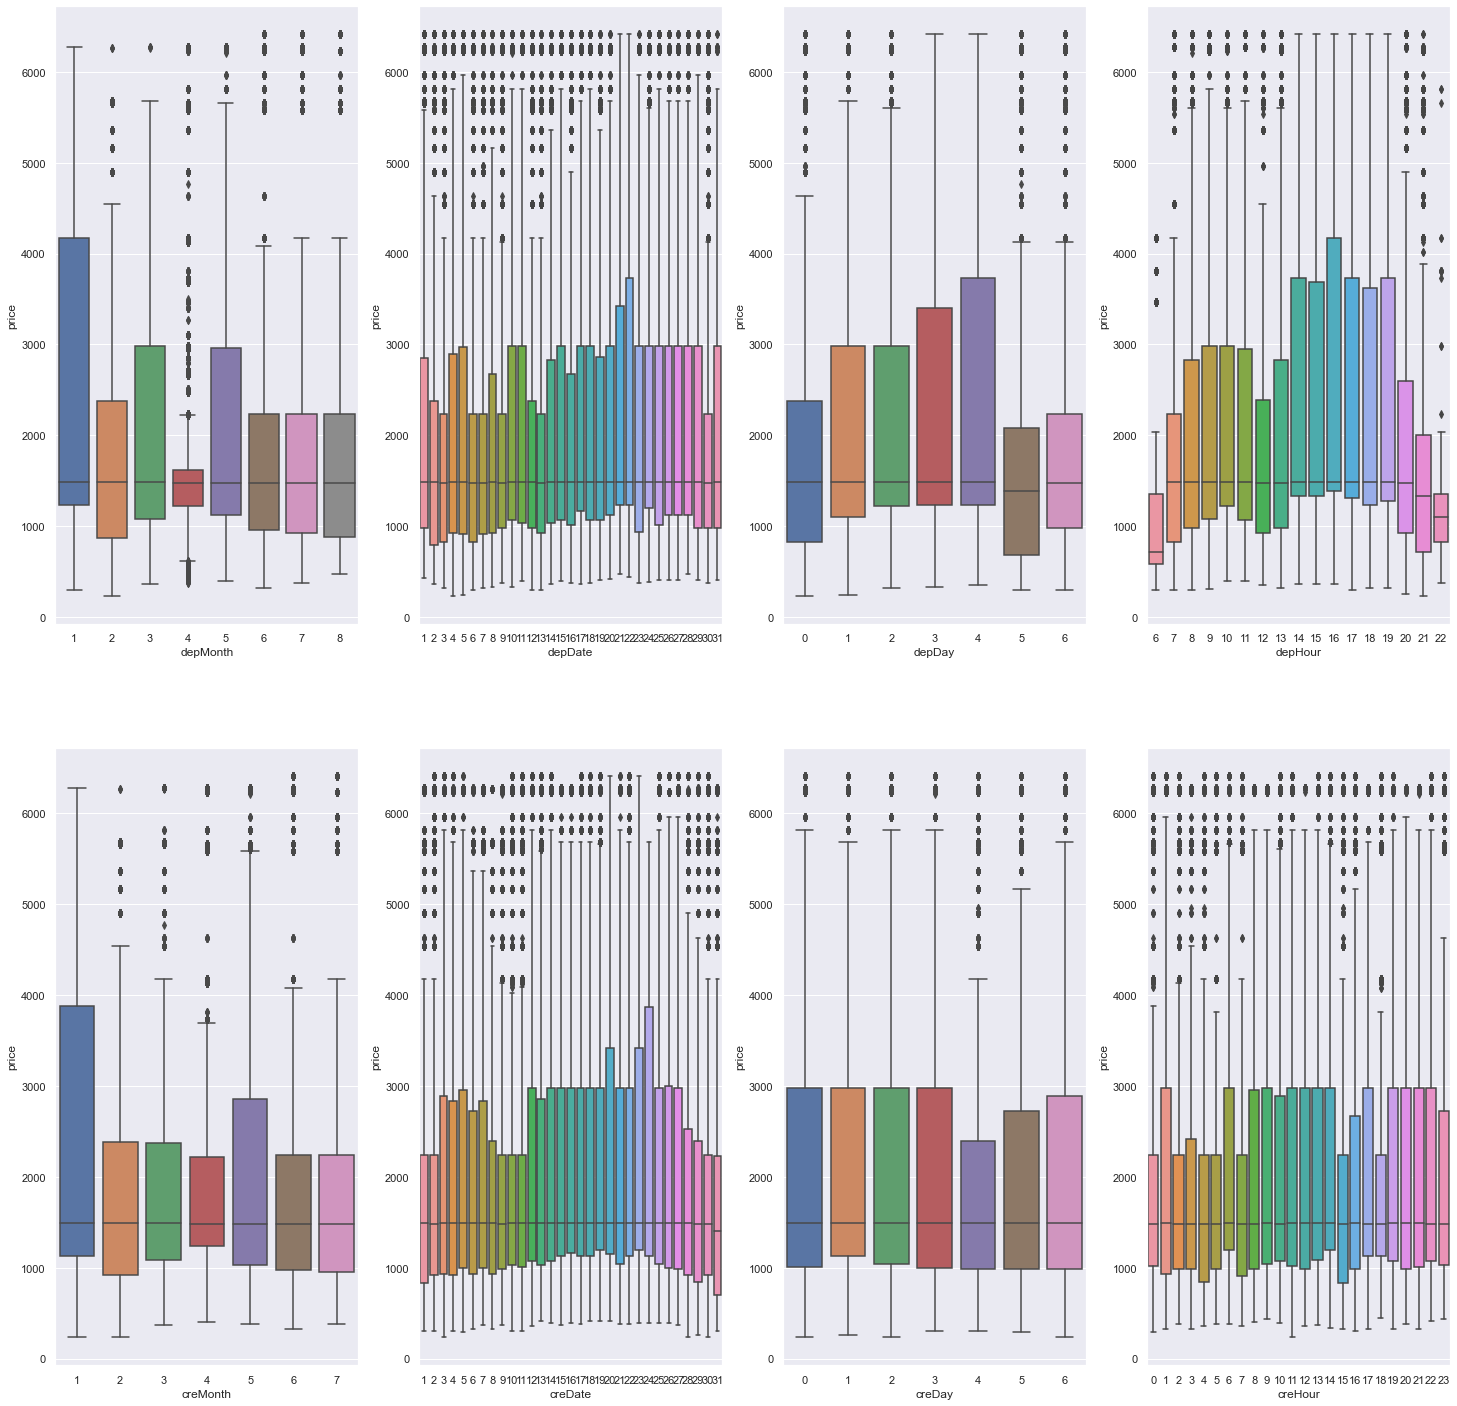

In [25]:
plt.figure(figsize=(25,25))
i=1
for feature in plot_features2:
    plt.subplot(2,4,i)
    sns.boxplot(x = feature, y = 'price', data = dataset)
    i+=1

In [26]:
plot_features3 = ['price','rate', 'dateDifference','flightDuration']

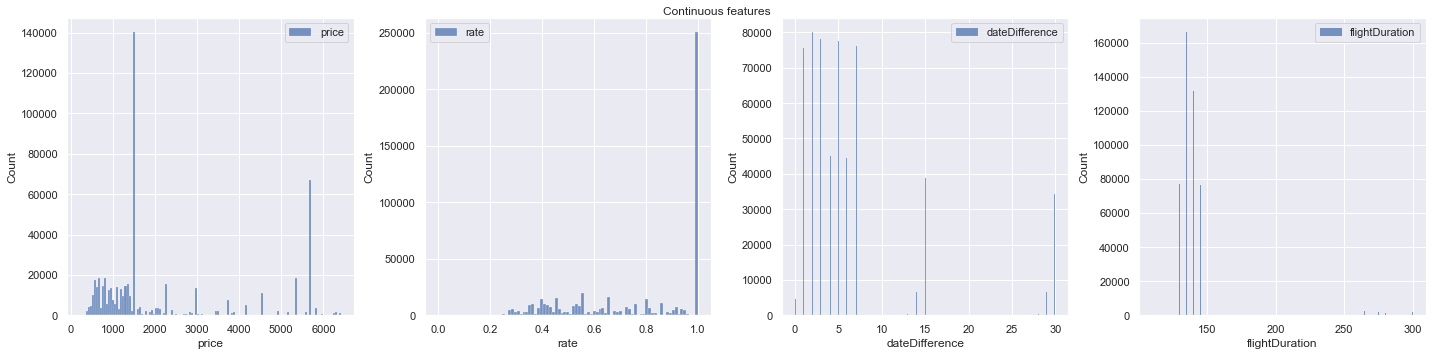

In [27]:
fig = plt.figure(figsize = (20,5))
j = 0
for i in plot_features3:
    plt.subplot(1, 4, j+1)
    j += 1
    sns.histplot(dataset[i], label = i)
    plt.legend(loc='best')
fig.suptitle('Continuous features')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Removing unnecessary features

In [28]:
dataset = dataset.drop(['ID','flightNumber','traAirport','arrAirport','departureDate','arrivalDate','createDate','depYear','creYear'],axis = 1)

In [29]:
dataset.columns

Index(['craftTypeCode', 'depAirport', 'cabinClass', 'priceClass', 'price',
       'rate', 'dateDifference', 'indirectFlight', 'depMonth', 'depDate',
       'depDay', 'depHour', 'creMonth', 'creDate', 'creDay', 'creHour',
       'flightDuration', 'airline'],
      dtype='object')

# Plotting correlation heatmap

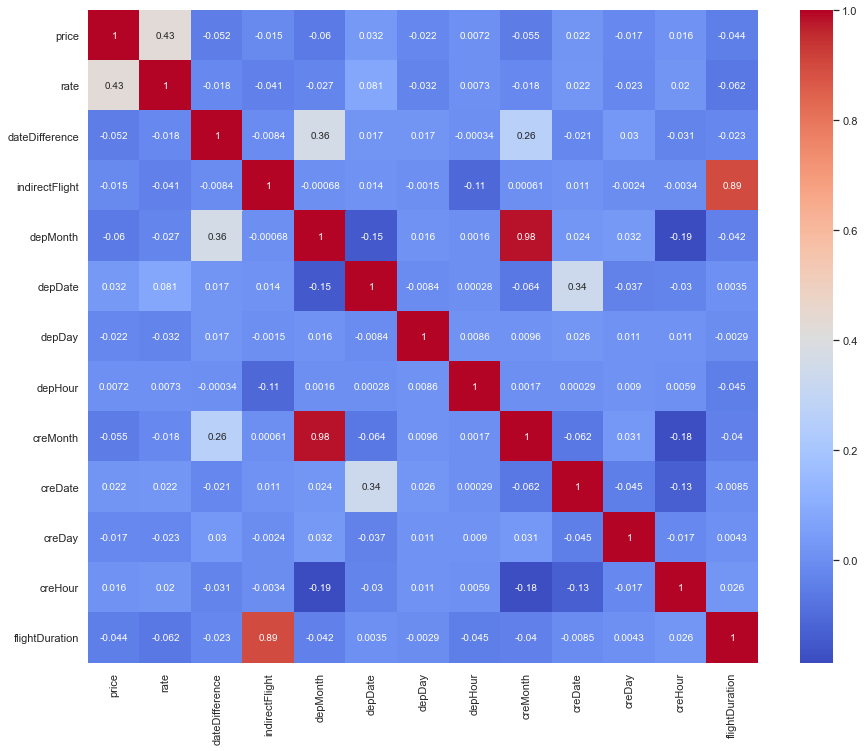

In [30]:
corr = dataset.corr()

plt.figure(figsize = (15,12))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

In [31]:
dataset = dataset.drop(['flightDuration','creMonth'],axis = 1)

In [32]:
dataset.columns

Index(['craftTypeCode', 'depAirport', 'cabinClass', 'priceClass', 'price',
       'rate', 'dateDifference', 'indirectFlight', 'depMonth', 'depDate',
       'depDay', 'depHour', 'creDate', 'creDay', 'creHour', 'airline'],
      dtype='object')

# Normalizing

In [33]:
dataset['dateDifference'] = (dataset['dateDifference'] - dataset['dateDifference'].min()) / (dataset['dateDifference'].max() - dataset['dateDifference'].min())    

# Encoding

In [34]:
# OneHotEncoding
categorical_cols = ['craftTypeCode', 'depAirport','cabinClass','priceClass','depMonth','depDate','depDay','airline']
dataset = pd.get_dummies(dataset, columns = categorical_cols, drop_first = True)
dataset.head()

,price,rate,dateDifference,indirectFlight,depHour,creDate,creDay,creHour,craftTypeCode_320,craftTypeCode_321,craftTypeCode_323,craftTypeCode_325,craftTypeCode_32A,craftTypeCode_32D,craftTypeCode_32L,craftTypeCode_32M,craftTypeCode_330,craftTypeCode_331,craftTypeCode_332,craftTypeCode_333,craftTypeCode_336,craftTypeCode_337,craftTypeCode_338,craftTypeCode_33A,craftTypeCode_33B,craftTypeCode_33C,craftTypeCode_33E,craftTypeCode_33G,craftTypeCode_33H,craftTypeCode_33L,craftTypeCode_33W,craftTypeCode_350,craftTypeCode_351,craftTypeCode_359,craftTypeCode_738,craftTypeCode_73B,craftTypeCode_73E,craftTypeCode_73G,craftTypeCode_73H,craftTypeCode_73K,craftTypeCode_73L,craftTypeCode_73N,craftTypeCode_73T,craftTypeCode_73U,craftTypeCode_744,craftTypeCode_747,craftTypeCode_773,craftTypeCode_77W,craftTypeCode_787,craftTypeCode_789,craftTypeCode_78A,craftTypeCode_78B,depAirport_SHA,cabinClass_F,cabinClass_Y,priceClass_B,priceClass_BZ,priceClass_C,priceClass_D,priceClass_E,priceClass_F,priceClass_G,priceClass_H,priceClass_I,priceClass_J,priceClass_K,priceClass_L,priceClass_M,priceClass_M1,priceClass_MC,priceClass_N,priceClass_NZ,priceClass_P,priceClass_Q,priceClass_R,priceClass_S,priceClass_S1,priceClass_T,priceClass_U,priceClass_V,priceClass_VZ,priceClass_W,priceClass_X,priceClass_XC,priceClass_Y,priceClass_Z,depMonth_2,depMonth_3,depMonth_4,depMonth_5,depMonth_6,depMonth_7,depMonth_8,depDate_2,depDate_3,depDate_4,depDate_5,depDate_6,depDate_7,depDate_8,depDate_9,depDate_10,depDate_11,depDate_12,depDate_13,depDate_14,depDate_15,depDate_16,depDate_17,depDate_18,depDate_19,depDate_20,depDate_21,depDate_22,depDate_23,depDate_24,depDate_25,depDate_26,depDate_27,depDate_28,depDate_29,depDate_30,depDate_31,depDay_1,depDay_2,depDay_3,depDay_4,depDay_5,depDay_6,airline_CZ,airline_FM,airline_HO,airline_HU,airline_MF,airline_MU
0,1860,1.00,0.033333,0,6,3,3,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1640,0.31,0.033333,0,7,3,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,5360,1.00,0.033333,0,7,3,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1635,0.29,0.033333,0,7,3,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1640,0.29,0.033333,0,7,3,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


# Dependent and independent features

In [35]:
X = dataset.drop(['price'],axis = 1)
y = dataset['price']

# Linear model without regularization

In [36]:
from sklearn import linear_model
np.set_printoptions(precision=5, suppress=True)

In [37]:
variables = X.columns
print(variables)

Index(['rate', 'dateDifference', 'indirectFlight', 'depHour', 'creDate',
       'creDay', 'creHour', 'craftTypeCode_320', 'craftTypeCode_321',
       'craftTypeCode_323',
       ...
       'depDay_3', 'depDay_4', 'depDay_5', 'depDay_6', 'airline_CZ',
       'airline_FM', 'airline_HO', 'airline_HU', 'airline_MF', 'airline_MU'],
      dtype='object', length=134)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print ("Train dataset sample size: %i" % len(X_train))
print ("Test dataset sample size: %i" % len(X_test))

Train dataset sample size: 398119
Test dataset sample size: 170623


In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [41]:
Xc = sm.add_constant(X_train)
linear_regression = sm.OLS(y_train,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.115e+05
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:03:37   Log-Likelihood:            -2.8097e+06
No. Observations:              398119   AIC:                         5.620e+06
Df Residuals:                  397984   BIC:                         5.621e+06
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1863.6446     14.468    128.814      0.000    1835.288    1892.001
rate               2192.4099      4.575    479.264      0.000    2183.444    2201.376
dateDifference      -41.0589      2.153    -19.068      0.000     -45.279     -36.838
indirectFlight       14.5818      3.995      3.650      0.000       6.752      22.412
depHour               0.2692      0.102      2.631      0.009       0.069       0.470
creDate               0.0372      0.072      0.520      0.603      -0.103       0.177
creDay                0.0591      0.239      0.247      0.805      -0.409       0.528
creHour               0.2842      0.095      2.983      0.003       0.097       0.471
craftTypeCode_320    22.7722     14.641      1.555      0.120      -5.923      51.468
craftTypeCode_321    58.5346     13.283      4.407      0.000      32.501      84.568
craftTypeCode_323    65.5136     13.388      4.893      0.000      39.273      91.754
craftTypeCode_325    74.6622     12.927      5.776      0.000      49.325      99.999
craftTypeCode_32A    75.6120     13.028      5.804      0.000      50.078     101.146
craftTypeCode_32D   480.9145    162.937      2.952      0.003     161.562     800.267
craftTypeCode_32L    69.3309     13.040      5.317      0.000      43.773      94.889
craftTypeCode_32M   -75.1939     19.671     -3.823      0.000    -113.748     -36.640
craftTypeCode_330    53.1011     13.192      4.025      0.000      27.244      78.958
craftTypeCode_331    80.6160     13.731      5.871      0.000      53.703     107.529
craftTypeCode_332    65.7419     14.941      4.400      0.000      36.458      95.026
craftTypeCode_333    74.7143     12.772      5.850      0.000      49.681      99.747
craftTypeCode_336    62.8532     17.122      3.671      0.000      29.295      96.412
craftTypeCode_337    80.3997     14.272      5.633      0.000      52.427     108.372
craftTypeCode_338    34.8692     13.700      2.545      0.011       8.018      61.721
craftTypeCode_33A    53.4053     12.851      4.156      0.000      28.218      78.592
craftTypeCode_33B    93.1148     36.124      2.578      0.010      22.313     163.917
craftTypeCode_33C   -67.4473     20.865     -3.233      0.001    -108.341     -26.553
craftTypeCode_33E    80.2230     13.585      5.905      0.000      53.597     106.849
craftTypeCode_33G   -49.3451     14.669     -3.364      0.001     -78.097     -20.594
craftTypeCode_33H    78.7057     14.123      5.573      0.000      51.026     106.386
craftTypeCode_33L    61.1203     12.748      4.794      0.000      36.134      86.107
craftTypeCode_33W   -17.0856     17.067     -1.001      0.317     -50.536      16.365
craftTypeCode_350   100.7019     13.580      7.416      0.000      74.086     127.318
craftTypeCode_351    85.5784     15.449      5.540      0.000      55.300

In [42]:
from sklearn.linear_model import LinearRegression
linear_reg = linear_model.LinearRegression()

In [43]:
fitted_lin_model = linear_reg.fit(X_train,y_train)
y_pred_train = fitted_lin_model.predict(X_train)
y_pred_test = fitted_lin_model.predict(X_test)

In [44]:
print('Training set R2: %0.3f' % r2_score(y_train,y_pred_train))
print('Training set root mean squared error %0.3f' % mean_squared_error(y_train, y_pred_train,squared=False))
print('Training set root mean absolute error %0.3f' % mean_absolute_error(y_train, y_pred_train))
print('*******************************************')
print('test set R2: %0.3f' % r2_score(y_test,y_pred_test))
print('test set root mean squared error %0.3f' % mean_squared_error(y_test, y_pred_test,squared=False))
print('test set root mean absolute error %0.3f' % mean_absolute_error(y_test, y_pred_test))

Training set R2: 0.974
Training set root mean squared error 281.060
Training set root mean absolute error 163.223
*******************************************
test set R2: 0.974
test set root mean squared error 284.343
test set root mean absolute error 163.645


# L1 regularization

In [45]:
from sklearn.linear_model import LassoCV

In [46]:
clf = LassoCV().fit(X_train, y_train)
importance = np.abs(clf.coef_)

<AxesSubplot:>

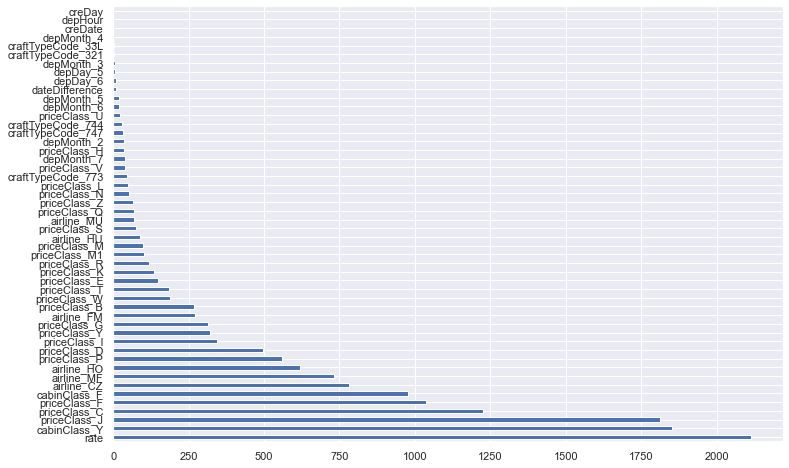

In [47]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feature_importances = pd.Series(importance, index=X.columns)
feature_importances.nlargest(50).plot(kind='barh')

In [48]:
selected_features = feature_importances.nlargest(50).index
selected_features

Index(['rate', 'cabinClass_Y', 'priceClass_J', 'priceClass_C', 'priceClass_F',
       'cabinClass_F', 'airline_CZ', 'airline_MF', 'airline_HO',
       'priceClass_P', 'priceClass_D', 'priceClass_I', 'priceClass_Y',
       'priceClass_G', 'airline_FM', 'priceClass_B', 'priceClass_W',
       'priceClass_T', 'priceClass_E', 'priceClass_K', 'priceClass_R',
       'priceClass_M1', 'priceClass_M', 'airline_HU', 'priceClass_S',
       'airline_MU', 'priceClass_Q', 'priceClass_Z', 'priceClass_N',
       'priceClass_L', 'craftTypeCode_773', 'priceClass_V', 'depMonth_7',
       'priceClass_H', 'depMonth_2', 'craftTypeCode_747', 'craftTypeCode_744',
       'priceClass_U', 'depMonth_6', 'depMonth_5', 'dateDifference',
       'depDay_6', 'depDay_5', 'depMonth_3', 'craftTypeCode_321',
       'craftTypeCode_33L', 'depMonth_4', 'creDate', 'depHour', 'creDay'],
      dtype='object')

In [49]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Linear model with selected features by regularization

In [50]:
fitted_lin_model = linear_reg.fit(X_train,y_train)
y_pred_train = fitted_lin_model.predict(X_train)
y_pred_test = fitted_lin_model.predict(X_test)

In [51]:
print('Training set R2: %0.3f' % r2_score(y_train,y_pred_train))
print('Training set root mean squared error %0.3f' % mean_squared_error(y_train, y_pred_train,squared=False))
print('Training set root mean absolute error %0.3f' % mean_absolute_error(y_train, y_pred_train))
print('*******************************************')
print('test set R2: %0.3f' % r2_score(y_test,y_pred_test))
print('test set root mean squared error %0.3f' % mean_squared_error(y_test, y_pred_test,squared=False))
print('test set root mean absolute error %0.3f' % mean_absolute_error(y_test, y_pred_test))

Training set R2: 0.974
Training set root mean squared error 284.000
Training set root mean absolute error 169.096
*******************************************
test set R2: 0.973
test set root mean squared error 286.988
test set root mean absolute error 169.334


In [52]:
selected_features = feature_importances.nlargest(16).index
selected_features

Index(['rate', 'cabinClass_Y', 'priceClass_J', 'priceClass_C', 'priceClass_F',
       'cabinClass_F', 'airline_CZ', 'airline_MF', 'airline_HO',
       'priceClass_P', 'priceClass_D', 'priceClass_I', 'priceClass_Y',
       'priceClass_G', 'airline_FM', 'priceClass_B'],
      dtype='object')

In [53]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [54]:
fitted_lin_model = linear_reg.fit(X_train,y_train)
y_pred_train = fitted_lin_model.predict(X_train)
y_pred_test = fitted_lin_model.predict(X_test)

In [55]:
print('Training set R2: %0.3f' % r2_score(y_train,y_pred_train))
print('Training set root mean squared error %0.3f' % mean_squared_error(y_train, y_pred_train,squared=False))
print('Training set root mean absolute error %0.3f' % mean_absolute_error(y_train, y_pred_train))
print('*******************************************')
print('test set R2: %0.3f' % r2_score(y_test,y_pred_test))
print('test set root mean squared error %0.3f' % mean_squared_error(y_test, y_pred_test,squared=False))
print('test set root mean absolute error %0.3f' % mean_absolute_error(y_test, y_pred_test))

Training set R2: 0.970
Training set root mean squared error 302.404
Training set root mean absolute error 171.866
*******************************************
test set R2: 0.970
test set root mean squared error 304.294
test set root mean absolute error 172.203


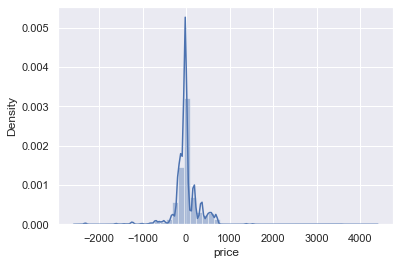

In [56]:
sns.distplot(y_test-y_pred_test)
plt.show()

# Final linear model

In [58]:
Xc = sm.add_constant(X[selected_features])
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.147e+06
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:06:38   Log-Likelihood:            -4.0566e+06
No. Observations:              568742   AIC:                         8.113e+06
Df Residuals:                  568725   BIC:                         8.113e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1632.5638      2.174    750.961      0.000    1628.303    1636.825
rate          1847.6966      2.802    659.480      0.000    1842.205    1853.188
cabinClass_Y -1798.3435      1.994   -901.972      0.000   -1802.251   -1794.436
priceClass_J  2007.5580      2.682    748.586      0.000    2002.302    2012.814
priceClass_C  1487.5837      3.247    458.184      0.000    1481.220    1493.947
priceClass_F  1131.5249      2.875    393.607      0.000    1125.890    1137.159
cabinClass_F  1075.5842      2.953    364.293      0.000    1069.797    1081.371
airline_CZ    -780.8889      2.856   -273.454      0.000    -786.486    -775.292
airline_MF    -756.3538      4.446   -170.112      0.000    -765.068    -747.639
airline_HO    -614.6994      2.507   -245.179      0.000    -619.613    -609.785
priceClass_P  -604.5125      2.600   -232.507      0.000    -609.608    -599.417
priceClass_D   658.3522      3.486    188.845      0.000     651.519     665.185
priceClass_I  -354.4276      2.626   -134.985      0.000    -359.574    -349.281
priceClass_Y  -164.8165      1.631   -101.038      0.000    -168.014    -161.619
priceClass_G  -174.7436      2.736    -63.862      0.000    -180.107    -169.381
airline_FM    -252.0464      1.868   -134.938      0.000    -255.707    -248.385
priceClass_B  -174.7422      1.692   -103.299      0.000    -178.058    -171.427
==============================================================================
Omnibus:                   191088.285   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6598790.460
Skew:                          -0.966   Prob(JB):                         0.00
Kurtosis:                      19.575   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""